plots of SOG model run
- 1100 x 10 x 101 domain
- 5 days
- river on

In [1]:
import os
import re
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#f=nc.Dataset('/data/eolson/MEOPAR/SS2DSOGruns/runSOG_02/SalishSea_1h_20041019_20041023_ptrc_T.nc')
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SalishSea2D_00/SalishSea_1d_20030819_20030927_grid_T.nc')
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=(f.variables['time_counter'][:])
xx,zz=np.meshgrid(lons,-z[:])
tt,tz=np.meshgrid(t-t[0],-z[:])
xt,yt=np.meshgrid(lons,lats)

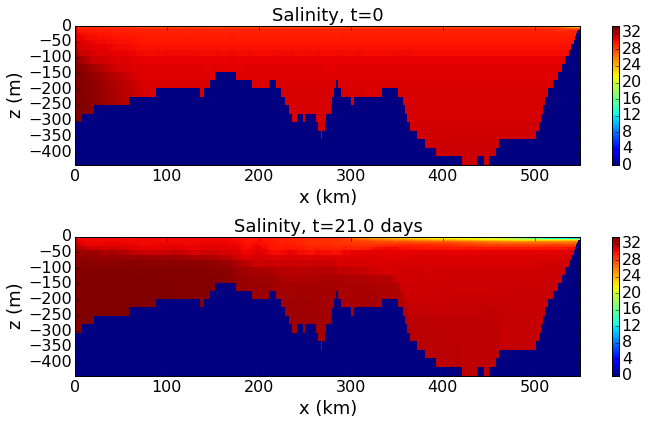

In [3]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f.variables['vosaline'][0,:,5,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Salinity, t=0', fontsize=18)
axs[0].autoscale(tight='True')
#axs[0].axis([0, lons[-1], -z[-1], 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f.variables['vosaline'][-1,:,5,:])
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Salinity, t=' + str((t[-1]-t[0])/3600/24) + ' days', fontsize=18)
axs[1].autoscale(tight='True')
#axs[1].axis([0, lons[-1], -z[-1], 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

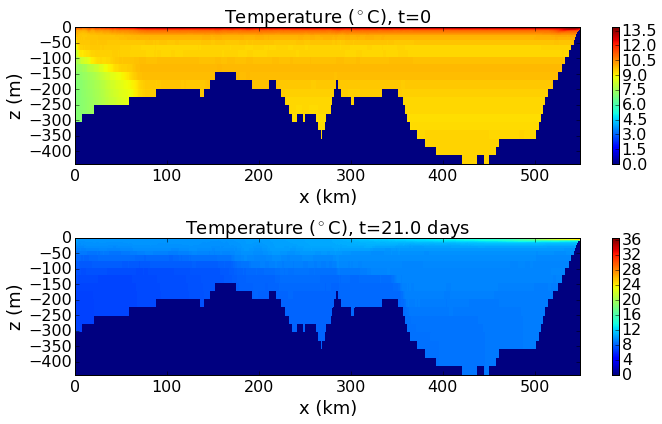

In [4]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f.variables['votemper'][0,:,5,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Temperature ($^\circ$C), t=0', fontsize=18)
axs[0].autoscale(tight='True')
#axs[0].axis([0, lons[-1], -z[-1], 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f.variables['votemper'][-1,:,5,:])
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Temperature ($^\circ$C), t=' + str((t[-1]-t[0])/3600/24) + ' days', fontsize=18)
axs[1].autoscale(tight='True')
#axs[1].axis([0, lons[-1], -z[-1], 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()


votemper
vosaline
buoy_n2


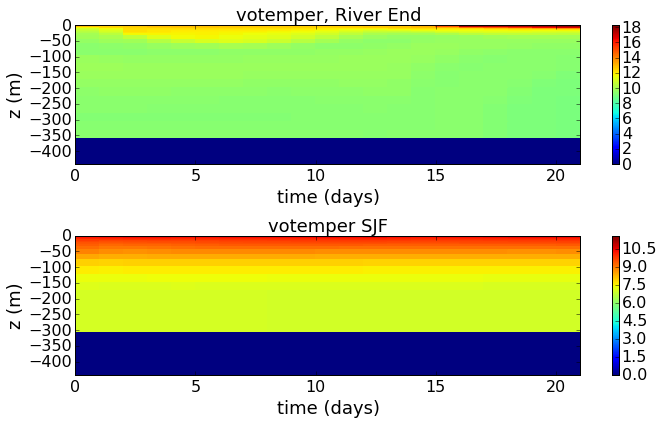

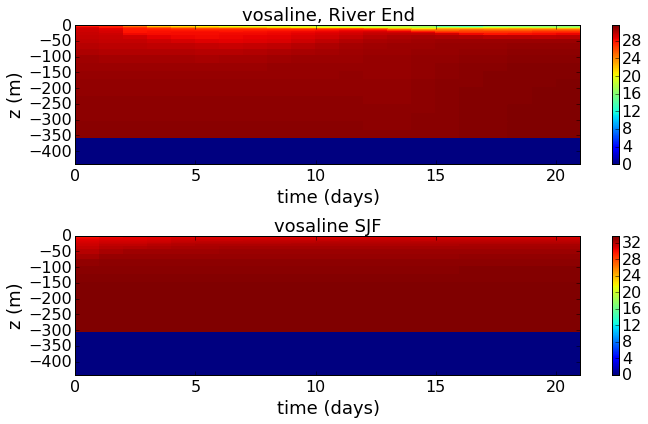

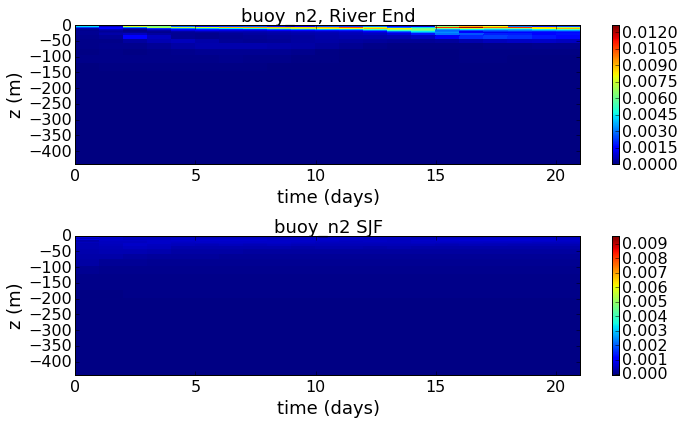

In [5]:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        print (ik)
        mesh0=axs[0].pcolormesh(tt/3600/24,tz,f.variables[ik][:,:,5,1000].conj().transpose())
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('time (days)', fontsize=18)
        axs[0].set_title(ik + ', River End', fontsize=18)
        axs[0].autoscale(tight='True')
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)
        plt.tight_layout()
        
        mesh1=axs[1].pcolormesh(tt/3600/24,tz,f.variables[ik][:,:,5,5].conj().transpose())
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('time (days)', fontsize=18)
        axs[1].set_title(ik + ' SJF', fontsize=18)
        axs[1].autoscale(tight='True')
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)
        plt.tight_layout()
